# Data Scientist Nanodegree

# Project: Starbucks Capstone Challenge


### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. In this project, I will understand the data and try to provide a solution for how Starbucks should deal with customers, which promotions should provide and to whom? instead of providing offers for all customer which that make the customers who completed offers feel better and may push them to be customers for a long time.<br>

I will combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type.<br>

### Problem Statement
The problem is Starbucks give each customer an offer, but there are some customers didn't use the offer or didn't view the offer and that is the problem. So I would like to make an analysis of Starbucks datasets to find which kind of people or their demography have an offer and they completed the offer. This segment of people should give them attention and send to them offers. Also, I would like to find which kind of offer (BOGO or Discount or Informational) do people more like or use more.The solution will reduce the overhead cost of sending offers to any customer. For that, I will accuracy metric to evaluate some supervised learning models. <br> 

# Business Understanding

In this project, I will analysis the datasets provided by answering these questions  which help to make a decision to solve the problem with visualizations and modeling the dataset:<br>
* Q1: What is the distribution of gender?<br>
* Q2: What is the distribution of income?<br>
* Q3: What is the distribution of income by gender?<br>
* Q4: Which the most year that the customers created an app account?<br>
* Q5: What are the most and the least common event?<br>
* Q6: What are the most and the least common offer type?<br>
* Q7: What are the most and the least common offer type by offer completed?<br>
* Q8: What is the distribution of gender by offer type?<br>
* Q9: What is the distribution of gender by event?<br>

Then, I will calculate the accuracy metrics for some of the models on the training and testing datasets and improve the best one. I selected accuracy due to the target variable classes in the data are tied and I would like to find the ratio of the total number of predictions that were correct. <br>

# Data Understanding

The data is contained in three files:<br>

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)<br>
* profile.json - demographic data for each customer<br>
* transcript.json - records for transactions, offers received, offers viewed, and offers completed<br>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math
import json
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [2]:
# Print the first five rows of portfolio
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [3]:
# Print number of rows and columns of portfolio
portfolio.shape

(10, 6)

In [4]:
# Print a descriptive statistics of portfolio
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [5]:
# Print the first five rows of profile
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
# Print number of rows and columns of profile
profile.shape

(17000, 5)

In [7]:
# Print a descriptive statistics of profile
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [8]:
# Print the first five rows of transcript
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [9]:
# Print number of rows and columns of transcript
transcript.shape

(306534, 4)

In [10]:
# Print a descriptive statistics of transcript
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


# Prepare Data
### Portfolio

In [11]:
# Create columns for channels features (one-hot encoding) by using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(portfolio['channels']),
                   columns=mlb.classes_,
                   index=portfolio['channels'].index)

# Drop channels column
portfolio = portfolio.drop('channels', axis=1)
portfolio = pd.concat([portfolio, res], axis=1, sort=False)
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


### Profile

In [12]:
# Check if there are any missing value in profile dataset
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [13]:
# Fill the missing value in gender column with NA
profile['gender'].fillna('NA', inplace=True)

# Fill the missing value in income column with mean of income
profile['income'].fillna((profile['income'].mean()), inplace=True)

In [14]:
# To ensure there are not any missing value in profile dataset
profile.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

### Transcript

In [15]:
# Check if there are any missing value in transcript dataset
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [16]:
# Print values and counts of value column
transcript.value.value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}    14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}    14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}    14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}    14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}    14374
                                                    ...  
{'amount': 439.14}                                      1
{'amount': 42.75}                                       1
{'amount': 650.75}                                      1
{'amount': 943.4}                                       1
{'amount': 44.21}                                       1
Name: value, Length: 5121, dtype: int64

In [17]:
# As we see above, value column has more than one feature
# To know featuers in value column
features = []
for x, row in transcript.iterrows():
    for f in row['value']:
        if f in features:
            continue
        else:
            features.append(f)

# Print features
features

['offer id', 'amount', 'offer_id', 'reward']

In [18]:
# Offer id is the same of offer_id
# So I will create one column for each values of value column by using iterrows()
# It seem like one_hot encoding
transcript['offer_id'] = ''
transcript['amount'] = 0
transcript['reward'] = 0

for x, row in transcript.iterrows():
    for f in row['value']:
        if f == 'offer_id' or f == 'offer id':
            transcript.at[x, 'offer_id']= row['value'][f]
        if f == 'amount':
            transcript.at[x, 'amount']= row['value'][f]
        if f == 'reward':
            transcript.at[x, 'reward']= row['value'][f]

# Drop the value column in transcript dataset
transcript = transcript.drop('value', axis=1)

# Print 3 first rows of transcript dataset
transcript.head(3)

,person,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0


In [19]:
# To see the update change and names of columns in Transcript dataset
transcript.columns

Index(['person', 'event', 'time', 'offer_id', 'amount', 'reward'], dtype='object')

# Data Modeling
### Q1: What is the distribution of gender?

/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


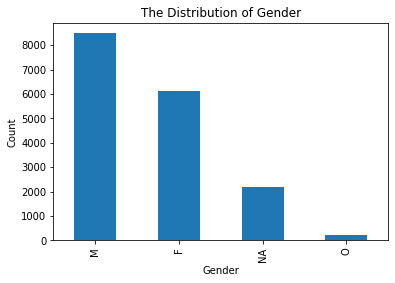

In [20]:
# Create a Bar chart for the distribution of gender
profile['gender'].value_counts().plot('bar')
plt.title('The Distribution of Gender')
plt.ylabel('Count')
plt.xlabel('Gender');

In [21]:
# Print describe details of gender
profile.gender.describe()

count     17000
unique        4
top           M
freq       8484
Name: gender, dtype: object

### Q2: What is the distribution of income?

/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


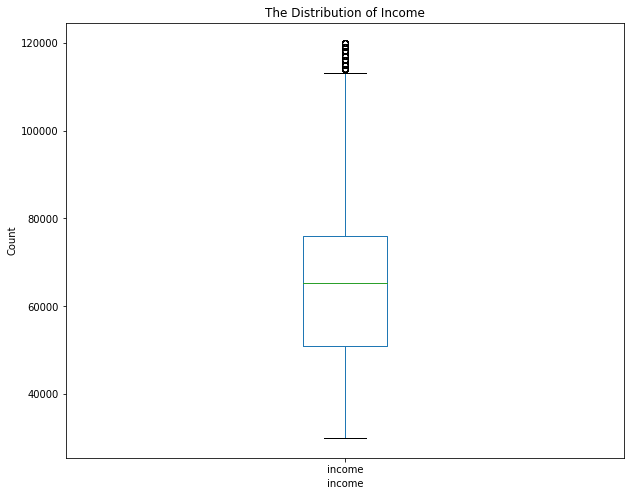

In [22]:
# Create a Box plot for the distribution of income
plt.figure(figsize=(10,8))
profile['income'].plot('box', figsize = (10,8))
plt.title('The Distribution of Income')
plt.ylabel('Count')
plt.xlabel('income');

In [23]:
# Print describe details of gender
profile.income.describe()

count     17000.000000
mean      65404.991568
std       20169.288288
min       30000.000000
25%       51000.000000
50%       65404.991568
75%       76000.000000
max      120000.000000
Name: income, dtype: float64

### Q3: What is the distribution of income by gender?

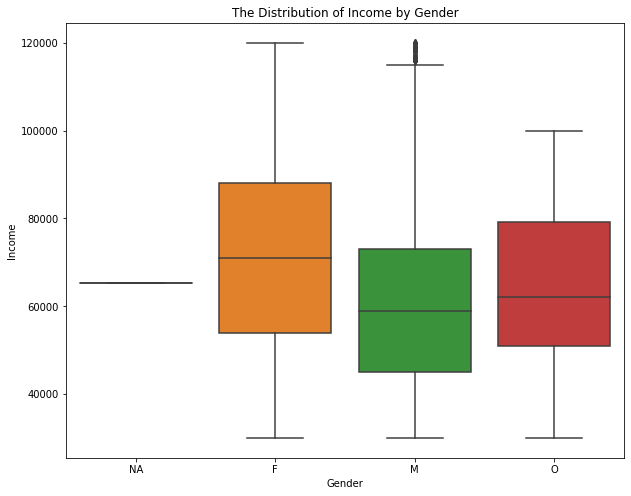

In [24]:
# Create a Box chart for the distribution of income by gender
#import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(x = 'gender', y = 'income', data = profile)
plt.title('The Distribution of Income by Gender')
plt.ylabel('Income')
plt.xlabel('Gender');

In [25]:
# Print the descriptive statistics of income by gender
income_gender = profile.groupby('gender')['income']
income_gender.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6129.0,71306.412139,2.233835e+04,30000.000000,54000.000000,71000.000000,88000.000000,120000.000000
M,8484.0,61194.601603,2.006952e+04,30000.000000,45000.000000,59000.000000,73000.000000,120000.000000
NA,2175.0,65404.991568,3.347710e-10,65404.991568,65404.991568,65404.991568,65404.991568,65404.991568
O,212.0,63287.735849,1.893859e+04,30000.000000,51000.000000,62000.000000,79250.000000,100000.000000


### Q4: Which the most year that the customers created an app account?

In [26]:
# Print the value counts of became_member)on column
profile.became_member_on.value_counts()

20171207    43
20170819    42
20171007    40
20171113    39
20170928    38
            ..
20150519     1
20131121     1
20131201     1
20150102     1
20140921     1
Name: became_member_on, Length: 1716, dtype: int64

In [27]:
# Create new column in Profile dataset for only year
profile['became_member_on_year'] = profile['became_member_on'].astype(str).str[:4]

/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


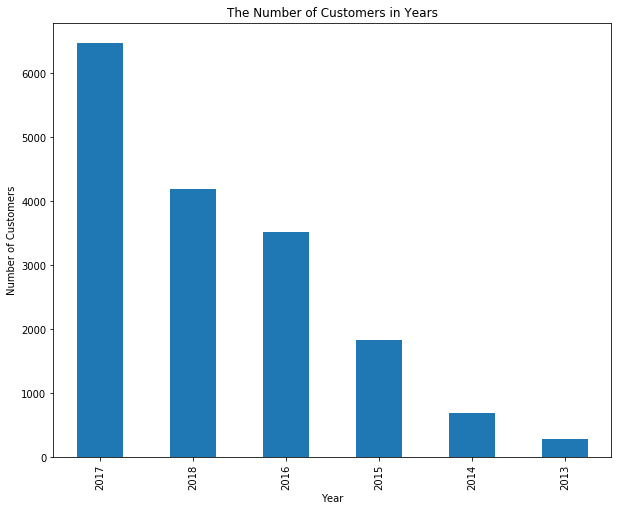

In [28]:
# Create a Bar chart for the number of customers in years
profile['became_member_on_year'].value_counts().plot('bar', figsize = (10,8))
plt.title('The Number of Customers in Years')
plt.ylabel('Number of Customers')
plt.xlabel('Year');

In [29]:
# Print the value counts of became_member_on_year column
profile.became_member_on_year.value_counts()

2017    6469
2018    4198
2016    3526
2015    1830
2014     691
2013     286
Name: became_member_on_year, dtype: int64

### Q5: What are the most and the least common event?

/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


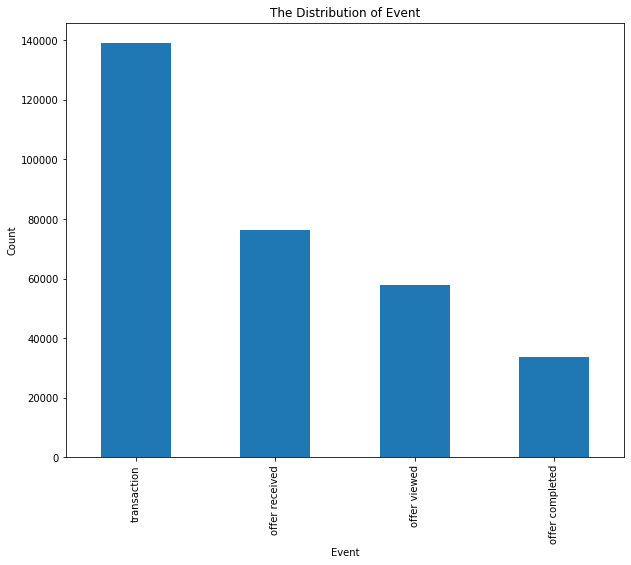

In [30]:
# Let us see the value count of event column
# Create a Bar chart for event
transcript['event'].value_counts().plot('bar', figsize = (10,8))
plt.title('The Distribution of Event')
plt.ylabel('Count')
plt.xlabel('Event');

In [31]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

### Q6: What are the most and the least common offer type?

In [32]:
# THIS TASK TAKES MORE TIME TO RUN
# To get offer_type from Portfolio dataset to Transcript dataset
# By match id column in Portfolio with offer_id column in Transcript
# Create get_offer_type function for that and return offer_type
def get_offer_type(offer_id):
    try:
        offer_type = portfolio[portfolio['id'] == offer_id]['offer_type'].values[0]
        return offer_type
    except:
        offer_type = 'NA'
        return offer_type

# Create a new column in Transcript dataset named offer_type
transcript['offer_type'] = transcript.apply(lambda x: get_offer_type(x['offer_id']), axis=1)

/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


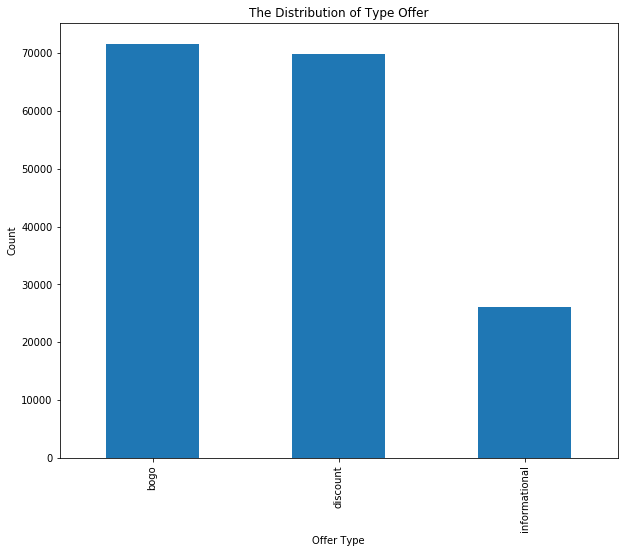

In [33]:
# Create a box plot for offer type without NA type
transcript[transcript['offer_type'] != 'NA']['offer_type'].value_counts().plot('bar', figsize = (10,8))
plt.title('The Distribution of Type Offer')
plt.ylabel('Count')
plt.xlabel('Offer Type');

In [34]:
transcript.offer_type.value_counts()

NA               138953
bogo              71617
discount          69898
informational     26066
Name: offer_type, dtype: int64

### Q7: What are the most and the least common offer type by offer completed?

The Most Offer Type For Customers Who Completed Offer Is: discount
Number of Customers: 17910
Offer Id: 5317
-----------------
The Least Offer Type For Customers Who Completed Offer Is: bogo
Number of Customers: 15669
Offer Id: 3331


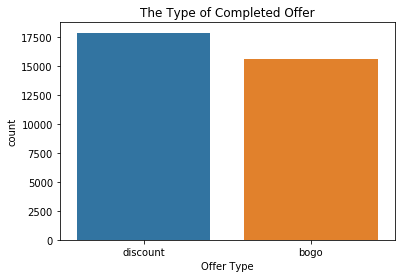

In [35]:
# I selected type of event which is offer_completed
# To see which offer type was used by customers.
offer_completed_type = transcript[transcript['event'] == 'offer completed']

# Create a bar plot 
sns.countplot(x=offer_completed_type['offer_type'])
plt.title('The Type of Completed Offer')
plt.xlabel('Offer Type');

# Print offer type name which is the most offer type used
print(f'The Most Offer Type For Customers Who Completed Offer Is: {offer_completed_type["offer_type"].value_counts().index[0]}')

# Print Number of Customers for the most offer type used
print(f'Number of Customers: {offer_completed_type["offer_type"].value_counts().values[0]}')

# Print offer id for the most offer type used
print(f'Offer Id: {offer_completed_type["offer_id"].value_counts().values[0]}') 

print('-----------------')

# Print offer type name which is the least offer type used
print(f'The Least Offer Type For Customers Who Completed Offer Is: {offer_completed_type["offer_type"].value_counts().index[-1]}')

# Print Number of Customers for the least offer type used      
print(f'Number of Customers: {offer_completed_type["offer_type"].value_counts().values[-1]}')

# Print offer id for the least offer type used      
print(f'Offer Id: {offer_completed_type["offer_id"].value_counts().values[-1]}')

### Q8: What is the distribution of gender by offer type?

In [36]:
# THIS TAKES MORE TIME TO RUN
# To get gender from Profile dataset to Transcript dataset
# Create get_customer_gender function for that and return gender
def get_customer_gender(profile_id):
    gender = profile[profile['id'] == profile_id]['gender'].values[0]
    return gender

# Create a new column in Transcript dataset named gender
transcript['gender'] = transcript.apply(lambda x: get_customer_gender(x['person']), axis=1)

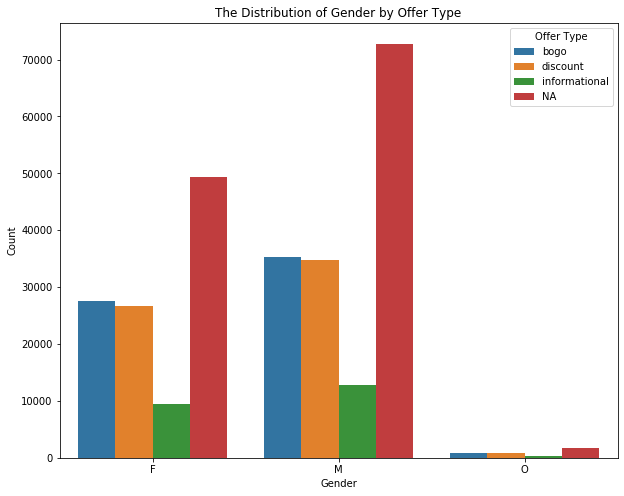

In [37]:
# Create a box plot for gender without NA type of gender by offer type
plt.figure(figsize=(10, 8))
sns.countplot(x=transcript[transcript["gender"] != 'NA']['gender'], hue="offer_type", data=transcript)
plt.title('The Distribution of Gender by Offer Type')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Offer Type')

In [38]:
# To see the exact numbers of transcript for gender (without NA) by each of offer type
gender_by_offer_type = transcript[transcript["gender"] != 'NA'].groupby(['gender','offer_type']).count()
gender_by_offer_type

person  event   time  offer_id  amount  reward
gender offer_type                                                   
F      NA              49382  49382  49382     49382   49382   49382
       bogo            27619  27619  27619     27619   27619   27619
       discount        26652  26652  26652     26652   26652   26652
       informational    9448   9448   9448      9448    9448    9448
M      NA              72794  72794  72794     72794   72794   72794
       bogo            35301  35301  35301     35301   35301   35301
       discount        34739  34739  34739     34739   34739   34739
       informational   12856  12856  12856     12856   12856   12856
O      NA               1781   1781   1781      1781    1781    1781
       bogo              914    914    914       914     914     914
       discount          920    920    920       920     920     920
       informational     356    356    356       356     356     356

In [39]:
# Count number of female transcript 
female_offer_type = gender_by_offer_type.loc[('F')]['event'].sum()

# Count number of female transcript for each type of offer types 
total_female_offer_type = gender_by_offer_type.loc[('F')].loc[['bogo', 'discount', 'informational']]['event'].sum()

# Print Female Transcripts Numbers
print(f'The Female Transcripts Number = {female_offer_type}')

# Print The Proportion of BOGO Offers for female
print(f"The Proportion of BOGO Offers =  {round((gender_by_offer_type.loc[('F', 'bogo')].values[0]/total_female_offer_type)*100,2)}% ")

# Print The Proportion of Discount Offers for female      
print(f"The Proportion of Discount Offers = {round((gender_by_offer_type.loc[('F', 'discount')].values[0]/total_female_offer_type)*100,2)}% ")

# Print The Proportion of Informational Offers for female      
print(f"The Proportion of Informational Offers = {round((gender_by_offer_type.loc[('F', 'informational')].values[0]/total_female_offer_type)*100,2)}% ")

print('----------------------')
      
# Count number of male transcript
male_offer_type = gender_by_offer_type.loc[('M')]['event'].sum()
      
# Count number of male transcript for each type of offer types
total_male_offer_type = gender_by_offer_type.loc[('M')].loc[['bogo', 'discount', 'informational']]['event'].sum()

# Print male Transcripts Numbers
print(f'The Male Transcripts Number = {male_offer_type}')

# Print The Proportion of BOGO Offers for male
print(f"The Proportion of BOGO Offers =  {round((gender_by_offer_type.loc[('M', 'bogo')].values[0]/total_male_offer_type)*100,2)}% ")

# Print The Proportion of Discount Offers for male      
print(f"The Proportion of Discount Offers = {round((gender_by_offer_type.loc[('M', 'discount')].values[0]/total_male_offer_type)*100,2)}% ")

# Print The Proportion of Informational Offers for male      
print(f"The Proportion of Informational Offers = {round((gender_by_offer_type.loc[('M', 'informational')].values[0]/total_male_offer_type)*100,2)}% ")


The Female Transcripts Number = 113101
The Proportion of BOGO Offers =  43.34% 
The Proportion of Discount Offers = 41.83% 
The Proportion of Informational Offers = 14.83% 
----------------------
The Male Transcripts Number = 155690
The Proportion of BOGO Offers =  42.58% 
The Proportion of Discount Offers = 41.91% 
The Proportion of Informational Offers = 15.51% 


### Q9: What is the distribution of gender by event?

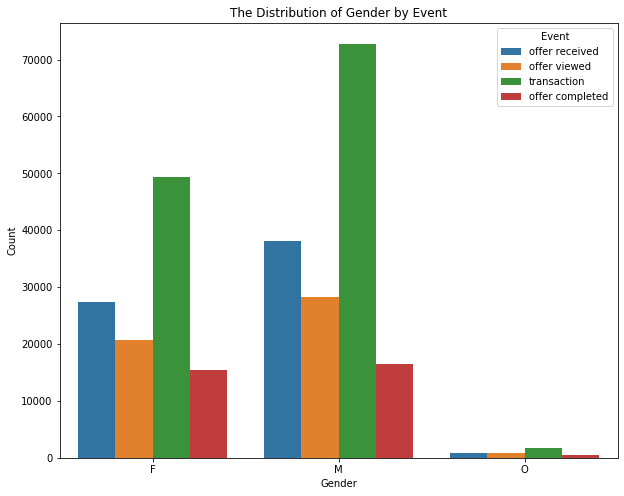

In [40]:
# Create a box plot for gender without NA type of gender by event
plt.figure(figsize=(10, 8))
sns.countplot(x=transcript[transcript["gender"] != 'NA']['gender'], hue="event", data=transcript)
plt.title('The Distribution of Gender by Event')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Event')

In [41]:
# To see the exact numbers of transcript for gender (without NA) by each of event type
gender_by_event_type = transcript[transcript["gender"] != 'NA'].groupby(['gender','event']).count()
gender_by_event_type

person   time  offer_id  amount  reward  offer_type
gender event                                                               
F      offer completed   15477  15477     15477   15477   15477       15477
       offer received    27456  27456     27456   27456   27456       27456
       offer viewed      20786  20786     20786   20786   20786       20786
       transaction       49382  49382     49382   49382   49382       49382
M      offer completed   16466  16466     16466   16466   16466       16466
       offer received    38129  38129     38129   38129   38129       38129
       offer viewed      28301  28301     28301   28301   28301       28301
       transaction       72794  72794     72794   72794   72794       72794
O      offer completed     501    501       501     501     501         501
       offer received      916    916       916     916     916         916
       offer viewed        773    773       773     773     773         773
       transaction        1781   1781      1781    1781    1781        1781

In [42]:
# Print Female Transcripts Numbers
print(f'The Female Transcripts Number = {female_offer_type}')

# Print The Proportion of  Offer Completed for female
print(f"The Proportion of Offer Completed Type =  {round((gender_by_event_type.loc[('F', 'offer completed')].values[0]/gender_by_event_type.loc[('F', 'offer received')].values[0])*100,2)}% of Offers Received ")

# Print The Proportion of Offer Received for female      
print(f"The Proportion of Offer Received Type = {round((gender_by_event_type.loc[('F', 'offer received')].values[0]/total_female_offer_type)*100,2)}% ")

# Print The Proportion of Offer Viewed for female      
print(f"The Proportion of Offer Viewed Type = {round((gender_by_event_type.loc[('F', 'offer viewed')].values[0]/total_female_offer_type)*100,2)}% ")

# Print The Proportion of Transaction for female      
print(f"The Proportion of Transaction Type = {round((gender_by_event_type.loc[('F', 'transaction')].values[0]/total_female_offer_type)*100,2)}% ")

print('----------------------')
      
# Print male Transcripts Numbers
print(f'The Male Transcripts Number = {male_offer_type}')

# Print The Proportion of  Offer Completed for male
print(f"The Proportion of Offer Completed Type =  {round((gender_by_event_type.loc[('M', 'offer completed')].values[0]/gender_by_event_type.loc[('M', 'offer received')].values[0])*100,2)}% of Offers Received ")

# Print The Proportion of Offer Received for male      
print(f"The Proportion of Offer Received Type = {round((gender_by_event_type.loc[('M', 'offer received')].values[0]/total_male_offer_type)*100,2)}% ")

# Print The Proportion of Offer Viewed for male      
print(f"The Proportion of Offer Viewed Type = {round((gender_by_event_type.loc[('M', 'offer viewed')].values[0]/total_male_offer_type)*100,2)}% ")

# Print The Proportion of Transaction for male      
print(f"The Proportion of Transaction Type = {round((gender_by_event_type.loc[('M', 'transaction')].values[0]/total_male_offer_type)*100,2)}% ")


The Female Transcripts Number = 113101
The Proportion of Offer Completed Type =  56.37% of Offers Received 
The Proportion of Offer Received Type = 43.09% 
The Proportion of Offer Viewed Type = 32.62% 
The Proportion of Transaction Type = 77.5% 
----------------------
The Male Transcripts Number = 155690
The Proportion of Offer Completed Type =  43.18% of Offers Received 
The Proportion of Offer Received Type = 46.0% 
The Proportion of Offer Viewed Type = 34.14% 
The Proportion of Transaction Type = 87.81% 


### Data Preprocessing

In [43]:
# THIS TAKES MORE TIME TO RUN
# I will add income column in transcript dataset may need it for model
# To get income from Profile dataset to Transcript dataset
# Create get_customer_income function for that and return income
def get_customer_income(profile_id):
    income = profile[profile['id'] == profile_id]['income'].values[0]
    return income

# Create a new column in Transcript dataset named income
transcript['income'] = transcript.apply(lambda x: get_customer_income(x['person']), axis=1)

In [44]:
# Take a look to transcript after changes
# Print a three first rows of Transcript dataset
transcript.head(3)

,person,event,time,offer_id,amount,reward,offer_type,gender,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,F,100000.000000
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,NA,65404.991568
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,discount,M,70000.000000


In [45]:
# I will save copy of Transcript into csv file to work on it
transcript.to_csv('clean_transcript.csv')

# Read 'clean_transcript.csv' file
transcript_cleaned = pd.read_csv('clean_transcript.csv').iloc[:, 1:]

# Print the first five rows of transcript_cleaned dataset
transcript_cleaned.head()

,person,event,time,offer_id,amount,reward,offer_type,gender,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,F,100000.000000
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,NaN,65404.991568
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,discount,M,70000.000000
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0,discount,NaN,65404.991568
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,bogo,NaN,65404.991568


In [46]:
# Check if there are any missing value in transcript_cleaned dataset
transcript_cleaned.isna().sum()

person             0
event              0
time               0
offer_id      138953
amount             0
reward             0
offer_type    138953
gender         33772
income             0
dtype: int64

In [47]:
# Fill the missing value in offer_id, offer_type and gender columns with NA
transcript_cleaned['offer_id'].fillna('NA', inplace=True)
transcript_cleaned['offer_type'].fillna('NA', inplace=True)
transcript_cleaned['gender'].fillna('NA', inplace=True)

In [48]:
# To ensure there are not any missing value in transcript_cleaned dataset
transcript_cleaned.isna().sum()

person        0
event         0
time          0
offer_id      0
amount        0
reward        0
offer_type    0
gender        0
income        0
dtype: int64

In [49]:
# Print number of rows and columns of transcript_cleaned
transcript_cleaned.shape

(306534, 9)

In [50]:
# Drop offer_id with NA value due to unneeded
transcript_cleaned = transcript_cleaned[transcript_cleaned['offer_id'] != 'NA']

In [51]:
# Updated number of rows and columns of transcript_cleaned
transcript_cleaned.shape

(167581, 9)

In [52]:
# I will replace categorical values to numerical values 
# For event, offer_id, offer_type and gender cloumns
# reference: https://www.datacamp.com/community/tutorials/categorical-data

# 'offer completed'= 1, 'offer received'= 2, 'offer viewed'= 3
event_type_labels = transcript_cleaned['event'].astype('category').cat.categories.tolist()
replace_event_type = {'event' : {k: v for k,v in zip(event_type_labels,list(range(1,len(event_type_labels)+1)))}}
print(replace_event_type)
print('------------------')

# '0b1e1539f2cc45b7b9fa7c272da2e1d7'= 1, '2298d6c36e964ae4a3e7e9706d1fb8c2': 2, 
# and so on
offer_id_labels = transcript_cleaned['offer_id'].astype('category').cat.categories.tolist()
replace_offer_id = {'offer_id' : {k: v for k,v in zip(offer_id_labels,list(range(1,len(offer_id_labels)+1)))}}
print(replace_offer_id)
print('------------------')

# 'bogo'= 1, 'discount'= 2, 'informational'= 3
offer_type_labels = transcript_cleaned['offer_type'].astype('category').cat.categories.tolist()
replace_offer_type = {'offer_type' : {k: v for k,v in zip(offer_type_labels,list(range(1,len(offer_type_labels)+1)))}}
print(replace_offer_type)
print('------------------')

# 'F'= 1, 'M'= 2, 'NA'= 3, 'O'= 4
gender_labels = transcript_cleaned['gender'].astype('category').cat.categories.tolist()
replace_gender = {'gender' : {k: v for k,v in zip(gender_labels,list(range(1,len(gender_labels)+1)))}}
print(replace_gender)

{'event': {'offer completed': 1, 'offer received': 2, 'offer viewed': 3}}
------------------
{'offer_id': {'0b1e1539f2cc45b7b9fa7c272da2e1d7': 1, '2298d6c36e964ae4a3e7e9706d1fb8c2': 2, '2906b810c7d4411798c6938adc9daaa5': 3, '3f207df678b143eea3cee63160fa8bed': 4, '4d5c57ea9a6940dd891ad53e9dbe8da0': 5, '5a8bc65990b245e5a138643cd4eb9837': 6, '9b98b8c7a33c4b65b9aebfe6a799e6d9': 7, 'ae264e3637204a6fb9bb56bc8210ddfd': 8, 'f19421c1d4aa40978ebb69ca19b0e20d': 9, 'fafdcd668e3743c1bb461111dcafc2a4': 10}}
------------------
{'offer_type': {'bogo': 1, 'discount': 2, 'informational': 3}}
------------------
{'gender': {'F': 1, 'M': 2, 'NA': 3, 'O': 4}}


In [53]:
# Replace these labels above in transcript_cleaned dataset
transcript_cleaned.replace(replace_event_type, inplace=True)
transcript_cleaned.replace(replace_offer_id, inplace=True)
transcript_cleaned.replace(replace_offer_type, inplace=True)
transcript_cleaned.replace(replace_gender, inplace=True)

In [54]:
# Take a look to transcript_cleaned
# Print a three first rows of Transcript_cleaned dataset
transcript_cleaned.head(3)

,person,event,time,offer_id,amount,reward,offer_type,gender,income
0,78afa995795e4d85b5d9ceeca43f5fef,2,0,7,0,0,1,1,100000.000000
1,a03223e636434f42ac4c3df47e8bac43,2,0,1,0,0,2,3,65404.991568
2,e2127556f4f64592b11af22de27a7932,2,0,3,0,0,2,2,70000.000000


In [55]:
# Split data into the target (offer_type) and features_final 
target = transcript_cleaned['offer_type']

# I will drop person and offer_type columns due to unneeded any more
features_final = transcript_cleaned.drop(['person', 'offer_type'], axis = 1)

In [56]:
# Print a three first rows of target
target.head(3)

0    1
1    2
2    2
Name: offer_type, dtype: int64

In [57]:
# Print a three first rows of features_final
features_final.head(3)

,event,time,offer_id,amount,reward,gender,income
0,2,0,7,0,0,1,100000.000000
1,2,0,1,0,0,3,65404.991568
2,2,0,3,0,0,2,70000.000000


### Normalizing Numerical Features

In [58]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['time', 'amount', 'reward', 'income']

features_final[numerical] = scaler.fit_transform(features_final[numerical])

# Show an example of a record with scaling applied
display(features_final.head(n = 5))

,event,time,offer_id,amount,reward,gender,income
0,2,0.0,7,0.0,0.0,1,0.777778
1,2,0.0,1,0.0,0.0,3,0.393389
2,2,0.0,3,0.0,0.0,2,0.444444
3,2,0.0,10,0.0,0.0,3,0.393389
4,2,0.0,5,0.0,0.0,3,0.393389


### Split Data

In [61]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 134064 samples.
Testing set has 33517 samples.


### Metrics
I will calculate the accuracy metrics for some of the models on the training and testing datasets and improve the best one. I selected accuracy due to the target variable classes in the data are tied and I would like to find the ratio of the total number of predictions that were correct. Then, I will evaluat this metric on some models are Support Vector Machines (SVC), Random Forest Classifier, Naive Bayes and Logistic Regression.

In [62]:
# reference: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Create a function in which predict the model and returns the accuracy
def pred_score(model):
    pred = model.predict(X_test)
    
    # Count errors
    errors = abs(pred - y_test)
    
    # Count mean percentage error
    mpe = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mpe)
    return round(accuracy, 2)

#### Support Vector Machines (SVC)

In [63]:
# Import the supervised learning model (SVC) from sklearn
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Fit the model
svm.fit(X_train, y_train)

print(f'The Accuracy of SVC Classifier on Training Set: {round(svm.score(X_train, y_train)*100,2)}%.')
print(f'The Prediction Accuracy: {pred_score(svm)}%')

The Accuracy of SVC Classifier on Training Set: 91.45%.
The Prediction Accuracy: 94.35%


#### Random Forest Classifier

In [64]:
# Import the supervised learning model RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier().fit(X_train, y_train)

# Fit the model
rf.fit(X_train, y_train)

print(f'The Accuracy of Random Forest Classifier on Training Set: {round(rf.score(X_train, y_train)*100,2)}%.')
print(f'The Prediction Accuracy: {pred_score(rf)}%')

The Accuracy of Random Forest Classifier on Training Set: 100.0%.
The Prediction Accuracy: 100.0%


#### Naive Bayes

In [65]:
# Import the supervised learning model Naive Bayes from sklearn
from sklearn.naive_bayes import GaussianNB 

# Initialize the model
nb = GaussianNB() 

# Fit the model
nb.fit(X_train, y_train) 

print(f'The Accuracy of Naive Bayes Classifier on Training Set: {round(nb.score(X_train, y_train)*100,2)}%.')
print(f'The Prediction Accuracy: {pred_score(nb)}%')

The Accuracy of Naive Bayes Classifier on Training Set: 48.8%.
The Prediction Accuracy: 25.37%


#### Logistic Regression

In [66]:
# Import the supervised learning model Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train, y_train)

print(f'The Accuracy of Logistic Regression Classifier on Training Set: {round(log_reg.score(X_train, y_train)*100,2)}%.')
print(f'The Prediction Accuracy: {pred_score(log_reg)}%')

The Accuracy of Logistic Regression Classifier on Training Set: 63.86%.
The Prediction Accuracy: 79.22%


/home/lenovo/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Implementation

Before evaluating the accuracy metric, I made some processing on data to keep it ready to implement the metrics on it: I replaced the categorical value into a numerical value, selected the target (offer_type) and features, normalized the numerical features, split the data that I chose, Implemented the metric. I created a function which predicts the model and returns the accuracy that is the ratio of the total number of predictions that were correct. <br>

I used three supervised learning models. They are Support Vector Machines (SVC), Random Forest Classifier, Naive Bayes and Logistic Regression. There is a model showed 100% of accuracy on the training set and testing set may due to over-fitting. It is Random Forest Classifier. The Support Vector Machince model showed a good accuracy in the training set and on the testing set. The Naive Bayes model showed the lowset of accuracy in the training set and on the testing set. The Logistic Regression showed a reasonable result which is 63.86% on the training set and 79.22% on the testing set. So, I prefer to choose this model and evaluate some of the parameters tom make improvement.<br>

### Model Improvement

In [68]:
# I will define new parameters to improve tht model
# Create the parameters list to tune.
from sklearn.model_selection import GridSearchCV
dual = [True, False]
max_iter = [100, 110]
C = [1.0,1.5]
param_grid = dict(dual = dual, max_iter = max_iter, C = C)

# Initialize the classifier
lr = LogisticRegression(penalty='l2')

# Perform grid search on the classifier 
grid = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3, n_jobs = -1)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid.fit(X_train, y_train)


print(f'The Best Score: {grid_fit.best_score_}')
print(f'The Best params: {grid_fit.best_params_}')

The Best Score: 0.6458855472013366
The Best params: {'C': 1.5, 'dual': False, 'max_iter': 110}


/home/lenovo/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Refinement

As we see above, after I tried to improve the model by defined new parameters and using GridSearchCV, the best result was 0.65 and it looks good and a little same with the previous result.

# Conclusion

Let's see the result of the analysis I did above, see the answers on the questions that I defined at the beginning and see how help to make a decision.<br>
<br>
* From the distribution of gender bar plot, the best-purchaser are male with 8484 then the female.<br>
<br>
* From the distribution of income box plot, the max number of income is 120000 and the mean is 65404.<br>
<br>
* From the distribution of income by gender box plot, the females' income means are 71306 and more than males which are 61194. Even though males purchasers are more than females.<br>
<br>
* From the number of customers in years bar plot, the most year contained the most number of the customer is 2017 with 6469. Then, the year of 2018 with 4198 customers. We can see the highest difference between the years was between 2016 and the year 2017. It is for 2943 customers. In 2018, the number of customers decreased to 4198 customers.<br>
<br>
* From the distribution of event bar plot, the most common event was the transaction. There was 138953 transaction. The least common event was offer completed. There was 33579 offer completed.<br>
<br>
* From the distribution of type offer bar plot, the most common offer type was BOGO with 71617 transcripts. Then, discount offer type with 69898 transcripts. The least common offer type was informational with 26066 transcripts.<br>
<br>
* From the type of completed offer bar plot, the most offer type was completed was a discount with 17910 customers. The least offer type was completed was a BOGO with 15669 customers.<br> 
<br>
* From the distribution of gender by offer type bar plot, the male customers' ar higher in all offer type than females. The BOGO type offer is higher than a discount for each of males and females. Let's see:<br>
<br>

    * The **Female** Transcripts Number = 113101<br>
    * The Proportion of BOGO Offers =  43.34%<br> 
    * The Proportion of Discount Offers = 41.83%<br> 
    * The Proportion of Informational Offers = 14.83%<br> 
---------------------- <br>

    * The **Male** Transcripts Number = 155690<br>
    * The Proportion of BOGO Offers =  42.58%<br> 
    * The Proportion of Discount Offers = 41.91%<br> 
    * The Proportion of Informational Offers = 15.51%<br>


* From the distribution of gender by event bar plot, the male customers' ar higher in all event type than females. There are a little different in the offer completed event between males and females. Males who completed offer are a little higher than females. Let's see:<br>
<br>

    * The **Female** Transcripts Number = 113101<br>
    * The Proportion of Offer Completed Type =  56.37% of Offers Received<br> 
    * The Proportion of Offer Received Type = 43.09% <br>
    * The Proportion of Offer Viewed Type = 32.62% <br>
    * The Proportion of Transaction Type = 77.5% <br>
---------------------- <br>

    * The **Male** Transcripts Number = 155690<br>
    * The Proportion of Offer Completed Type =  43.18% of Offers Received <br>
    * The Proportion of Offer Received Type = 46.0% <br>
    * The Proportion of Offer Viewed Type = 34.14% <br>
    * The Proportion of Transaction Type = 87.81% <br>
<br>
* I made some processing on data to keep it ready to implement the metrics on it: <br>
    * I replace the categorical value into a numerical value. <br>
    * select the target (offer_type) and features.<br>
    * Normalize the numerical features.<br>
    * split the data that I chose.<br>
    * Implement the metrics.<br>
<br>    
* I used three supervised learning models. They are Support Vector Machines (SVC), Random Forest Classifier, Naive Bayes and Logistic Regression. There are two models showed 100% of accuracy on the training set and testing set may due to over-fitting. They are Support Vector Machines and Random Forest Classifier. The Naive Bayes model showed the lowset of accuracy in the training set and on the testing set. The Logistic Regression showed a reasonable result which is 65.45% on the training set and 80.73% on the testing set. So, I prefer to choose this model and evaluate some of the parameters tom make improvement.<br>
<br>
* I improved the model by defining some parameters and the result was very good and acceptable with 0.65 accuracies of the best score. 
    

## Final Advice

Based on the analysis above, there is a 13% difference between male and female who completed the offer of received offer and the females is higher than males. In addition, the favorite offer type for female (43.34%) and male (42.58%) is BOGO then Discount. So, I recommend Starbucks to provide offers for female due to the females' income mean are 71306 and more than males which are 61194. Even though males purchaser are more than females and the Proportion of transaction for males (87.81%) is higher than females (77.5%). Finally, I think may this decision will change if we have completed dataset and without have missing values.<br>